<class 'pandas.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


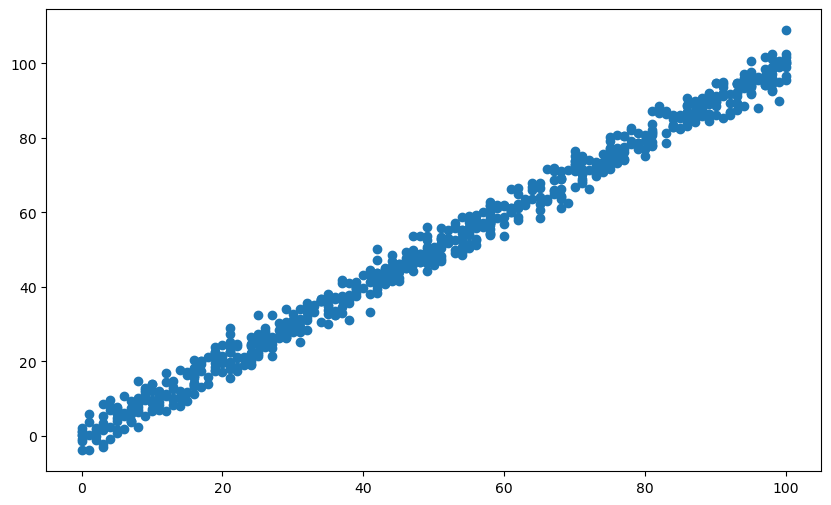

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/data_lr.csv')
data.info()

x_null, y_null = data.x.isnull(), data.y.isnull()

x_input = data.x[~(x_null + y_null)]
y_target = data.y[~(x_null + y_null)]
n = len(x_input)

plt.figure(figsize=(10, 6))
plt.scatter(x_input, y_target)
plt.show()

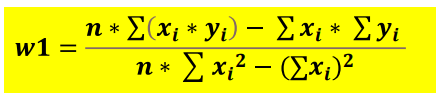

In [71]:
# --- Calculating Linear Regression Coefficients (Ordinary Least Squares) ---

sum_xy = (x_input * y_target).sum()
sum_x = x_input.sum()
sum_y = y_target.sum()
sum_xx = (x_input * x_input).sum()
sum_x_squared = sum_x ** 2

# Calculating Slope (w1)
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x_squared)
print(f"Slope (w1): {slope}")

Slope (w1): 1.0006563818563041


In [72]:
x_mean = x_input.mean()
y_mean = y_target.mean()

# Calculating Intercept (b)
intercept = y_mean - slope * x_mean
print(f"Intercept (b): {intercept}")

Intercept (b): -0.10726546430097983


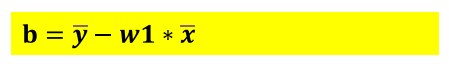

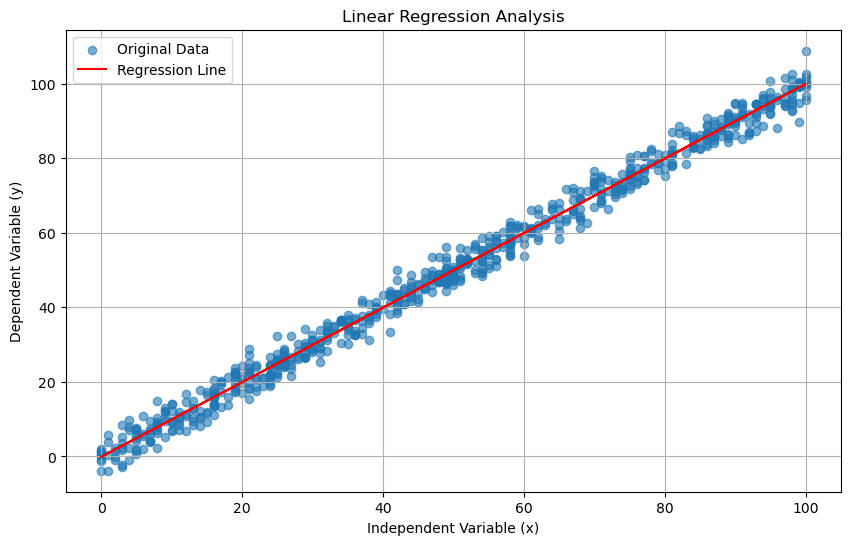

In [73]:
regression_line = x_input * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_input, y_target, label='Original Data', alpha=0.6) # Using scatter for points
plt.plot(x_input, regression_line, color='red', label='Regression Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()

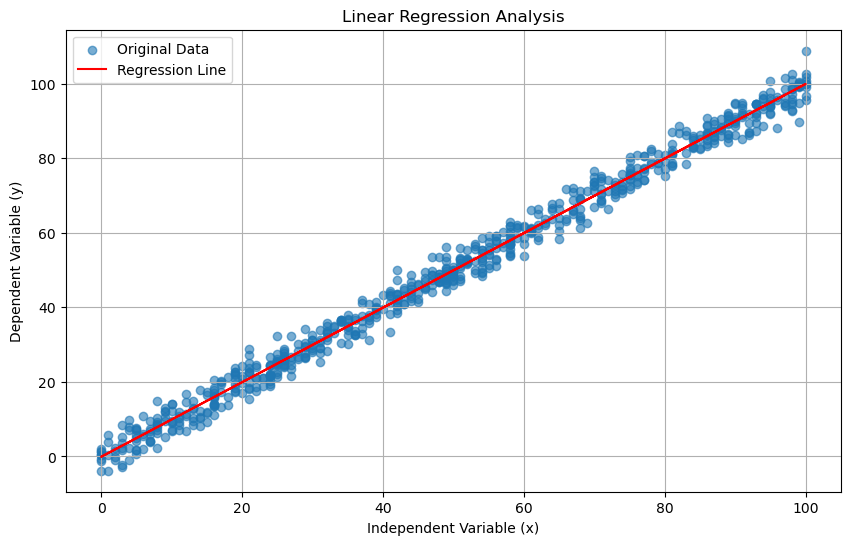

In [78]:
from sklearn.linear_model import LinearRegression
import numpy as np

x, y = np.array(x_input), np.array(y_target)

reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))

w1 = reg.coef_[0][0]
b = reg.intercept_[0]

yy = w1 * x + b

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data', alpha=0.6) # Using scatter for points
plt.plot(x, yy, color='red', label='Regression Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()
